# k-Nearest-Neighbors

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

np.random.seed(0)

## Datengrundlage

In [2]:
# Originale Daten
x = np.random.randint(0, 1400, 30)
y = x * 0.053 + 16
y += np.random.normal(-5, 5, 30)

x = x.reshape(-1, 1)

# Target binarisieren - bestanden?
passed = np.where(y >= 50, 1, 0)

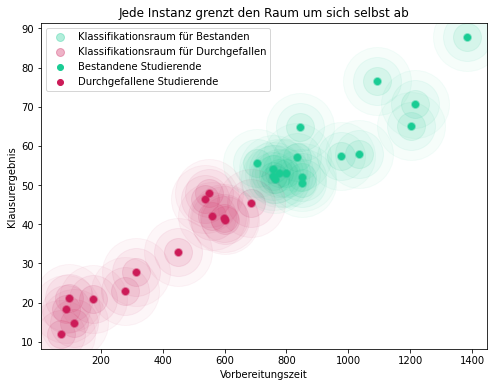

In [3]:
plt.figure(figsize=(8, 6))

# Klassifikationsraum mit mehreren Kreisen plotten
for i in np.arange(.1, 1.01, .25):
    plt.scatter(x[np.where(passed == 1)],y[np.where(passed == 1)], s=(80 * i) ** 2, c="#1ACC94", alpha=1/i/30,label="Klassifikationsraum für Bestanden" if i == 0.1 else "")
    plt.scatter(x[np.where(passed == 0)],y[np.where(passed == 0)], s=(80 * i) ** 2, c="#CC1B58", alpha=1/i/30,label="Klassifikationsraum für Durchgefallen" if i == 0.1 else "")

# Reale Datenpunkte Plotten
plt.scatter(x[np.where(passed == 1)],y[np.where(passed == 1)], c="#1ACC94", label="Bestandene Studierende")
plt.scatter(x[np.where(passed == 0)],y[np.where(passed == 0)], c="#CC1B58", label="Durchgefallene Studierende")
plt.legend()
plt.title("Jede Instanz grenzt den Raum um sich selbst ab")
plt.xlabel("Vorbereitungszeit")
plt.ylabel("Klausurergebnis")
plt.show()
            

## Beispiel im zweidimensionalen Raum

In [4]:
data = np.random.normal(100, 20, size=(50, 2))
target = np.mean(data+np.random.normal(100, 10,size=(50, 2)), axis=1)
binary = np.where(target>np.mean(target), 1, 0)

unknown_instance = np.array([100, 100])
k = 10

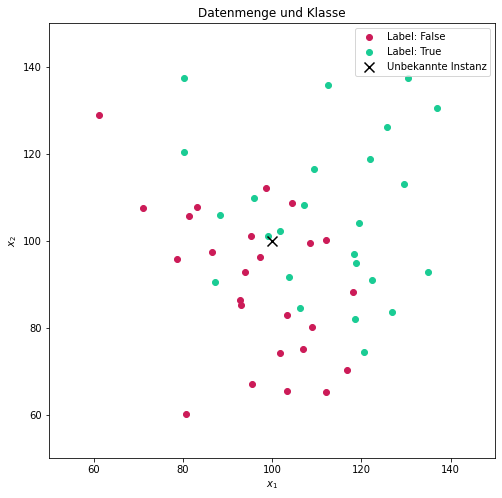

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(data[np.where(binary == 0), :1],data[np.where(binary == 0), 1:], c="#CC1B58", label="Label: False")
plt.scatter(data[np.where(binary == 1), :1],data[np.where(binary == 1), 1:], c="#1ACC94", label="Label: True")
plt.scatter(unknown_instance[0],unknown_instance[1], marker="x",s=100, c="black", alpha=1, label="Unbekannte Instanz")
plt.legend()
plt.title("Datenmenge und Klasse")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(50, 150)
plt.ylim(50, 150)
plt.show()

## Nächste Nachbar identifizieren

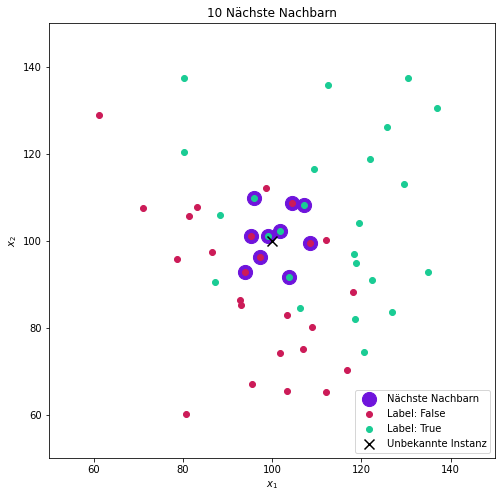

In [6]:
def euclidean_distance(p, q):
    return np.sqrt(np.sum((q - p) ** 2))

distances = []
for neighbor in data:
    distances.append(euclidean_distance(neighbor, unknown_instance))

plt.figure(figsize=(8, 8))

# Nächste Nachbarn hervorheben
plt.scatter(data[np.argsort(distances)[:k], :1], data[np.argsort(distances)[:k], 1:], s=200, c="#6F14DC", label="Nächste Nachbarn")

plt.scatter(data[np.where(binary == 0), :1],data[np.where(binary == 0), 1:], c="#CC1B58", label="Label: False")
plt.scatter(data[np.where(binary == 1), :1],data[np.where(binary == 1), 1:], c="#1ACC94", label="Label: True")
plt.scatter(unknown_instance[0],unknown_instance[1], marker="x",s=100, c="black", alpha=1, label="Unbekannte Instanz")

plt.legend()
plt.title("{} Nächste Nachbarn".format(k))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(50, 150)
plt.ylim(50, 150)
plt.show()

## Klassifikation der nächsten Nachbarn übernehmen

In [7]:
counts = np.bincount(binary[np.argsort(distances)[:k]])

print("Nachbarn sind {}x Gruppe 0 und {}x Gruppe 1. Ungewichtete Klassifizierung: {}".
      format(counts[0],counts[1], np.argmax(counts)))

votes_0 = np.sum(((binary[np.argsort(distances)[:k]] - 1) * (-1)) * (1 / np.sort(distances)[:k]))
votes_1 = np.sum(binary[np.argsort(distances)[:k]] * (1 / np.sort(distances)[:k]))


print("Nachbarn Gewicht {:.2f} für Gruppe 0 und Gewicht {:.2f} für Gruppe 1. Gewichtete Klassifizierung: {}".
      format(votes_0, votes_1, 0 if votes_0 > votes_1 else 1))



Nachbarn sind 5x Gruppe 0 und 5x Gruppe 1. Ungewichtete Klassifizierung: 0
Nachbarn Gewicht 0.74 für Gruppe 0 und Gewicht 1.38 für Gruppe 1. Gewichtete Klassifizierung: 1


## Alternative Distanzfunktionen

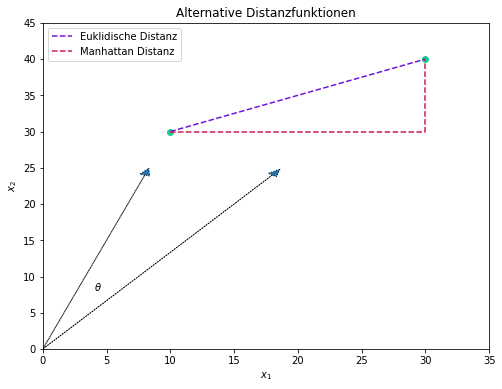

In [8]:
plt.figure(figsize=(8, 6))
plt.plot([10, 30],[30, 40], ls="--", c="#6F14DC", label="Euklidische Distanz")
plt.plot([10, 30, 30],[30, 30, 40], ls="--", c="#CC1B58", label="Manhattan Distanz")
plt.arrow(0, 0, 8, 24, head_width=0.8, head_length=1, ls="dotted")
plt.arrow(0, 0, 18, 24, head_width=0.8, head_length=1, ls="dotted")
plt.text(4, 8, "$\\theta$")
plt.scatter([10, 30],[30, 40], color="#1ACC94")
plt.xlim(0, 35)
plt.ylim(0, 45)
plt.title("Alternative Distanzfunktionen")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

## Das Problem der ungleichen Spannweiten

In [9]:
data_ranged = np.concatenate([np.random.normal(7000, 3000,size=(50, 1)), np.random.normal(16, 2, size=(50, 1))], axis=1)
target_ranged = np.mean(data)#+np.random.normal(100, 10, size=(50, 2)), axis=1)
binary_ranged = np.where(target > np.mean(target), 1, 0)

unknown_instance_ranged = np.array([8000, 16])
k = 10

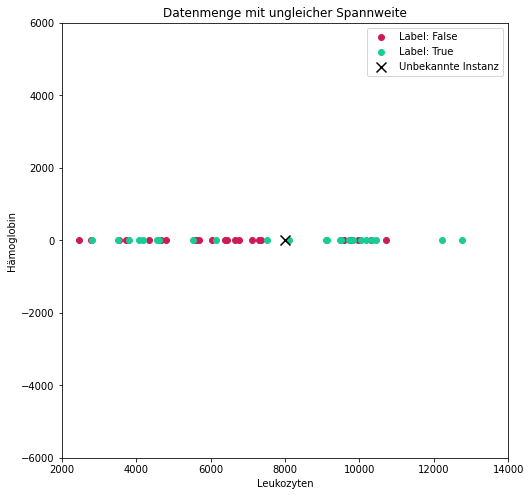

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(data_ranged[np.where(binary_ranged == 0), :1],data_ranged[np.where(binary_ranged == 0), 1:], c="#CC1B58",label="Label: False")
plt.scatter(data_ranged[np.where(binary_ranged == 1), :1],data_ranged[np.where(binary_ranged == 1), 1:], c="#1ACC94", label="Label: True")
plt.scatter(unknown_instance_ranged[0], unknown_instance_ranged[1],marker="x", s=100, c="black", alpha=1, label="Unbekannte Instanz")
plt.legend()
plt.title("Datenmenge mit ungleicher Spannweite")
plt.xlabel("Leukozyten")
plt.ylabel("Hämoglobin")
plt.xlim(2000, 14000)
plt.ylim(-6000, 6000)
plt.show()

## Mathematische Zusammenhänge

In [19]:
balance_scale = pd.read_csv("/data/balance-scale.csv")
balance_scale["Target"] = np.where(balance_scale["Target"] == "B", 1, 0)
x_train, x_test, y_train, y_test = train_test_split(balance_scale.drop(["Target"], axis=1), balance_scale["Target"])


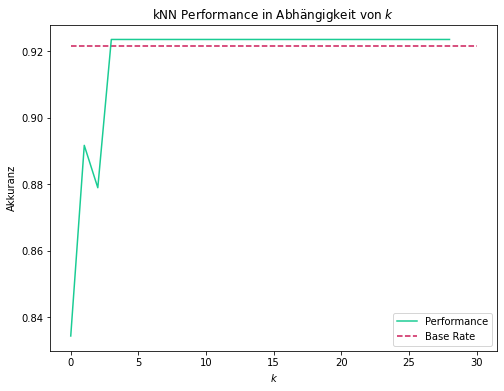

In [21]:
performances = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    performances.append(knn.score(x_test, y_test))
plt.figure(figsize=(8, 6))
plt.plot(performances, label="Performance", c="#1ACC94")
plt.hlines(balance_scale["Target"].value_counts()[0] / balance_scale.shape[0], 0, 30, ls="--", label="Base Rate", color="#CC1B58")
plt.title("kNN Performance in Abhängigkeit von $k$")
plt.xlabel("$k$")
plt.ylabel("Akkuranz")
plt.legend()
plt.show()

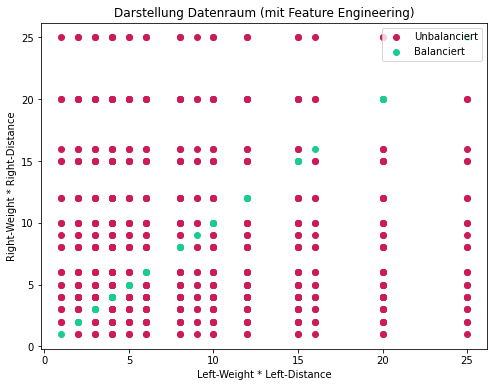

In [28]:
balance_scale["L"] = balance_scale["Left-Weight"] * balance_scale["Left-Distance"]
balance_scale["R"] = balance_scale["Right-Weight"] * balance_scale["Right-Distance"]

plt.figure(figsize=(8, 6))
plt.scatter(balance_scale.loc[balance_scale["Target"] == 0]["L"],balance_scale.loc[balance_scale["Target"] == 0]["R"], c="#CC1B58",label="Unbalanciert")
plt.scatter(balance_scale.loc[balance_scale["Target"] == 1]["L"],balance_scale.loc[balance_scale["Target"] == 1]["R"], c="#1ACC94",label="Balanciert")
plt.xlabel("Left-Weight * Left-Distance")
plt.ylabel("Right-Weight * Right-Distance")
plt.legend()
plt.title("Darstellung Datenraum (mit Feature Engineering)")
plt.show()